# Time series analysis

The North American Industry Classification System (NAICS) is an industry classification system developed by the statistical agencies of Canada, Mexico, and the United States. NAICS is designed to provide common definitions of the industrial structure of the three countries and a common statistical framework to facilitate the analysis of the three economies.

Time series analysis is a statistical technique that deals with time-series data, or trend analysis.  Time series data means that data is in a series of particular time periods or intervals.

The files from the data set are flat files, Excel (.xlsx), and CSV (.csv) files, we will merge and append data from several files to make a Data Output file. Our first task would be to carry out some data wrangling processes before we can make analysis, ask questions, and gain insights. 

Summary of the data set files we will be using:-
- 15 RTRA (Real-Time Remote Access) CSV files containing employment data by industry at different levels of aggregation, 2-digit NAICS, 3-digit NAICS, and 4-digit NAICS. We will search through rows with 2, or 3, or 4 digits NAICS and append employment data each month of each year from 1997 - 2018 
	Meaning of columns in the files:
		- SYEAR: Survey Year
		- SMTH: Survey Month
		- NAICS: Industry name and associated NAICS code in the bracket
		- _EMPLOYMENT_: Employment


- LMO Detailed Industries by NAICS: An excel file for mapping the RTRA data to the desired data row.
 Columns in the file:
		- Column 1 lists all 59 industries that are used frequently 
		- Column 2 list the industries NAICS definitions


As part of our data wrangling, we would create a dataset of monthly employment series from 1997 to 2018 for the industries.

One of the guiding principles for our data wrangling is to try to create each series from the highest possible level of aggregation in the raw data files, thus, if an LMO Detailed Industry is defined with a 2-digit NAICS only, we would not use a lower level of aggregation (i.e. 3-digit or 4-digit level NAICS files in the RTRA), similarly, if an LMO Detailed Industry is defined with a 3-digit NAICS only, we would not use the 4-digit NAICS files for that industry. 


In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
pwd

'C:\\Users\\Abu Bin Fahd\\Desktop\\Time Series\\A_NEWLY_HIRED_DATA_ANALYST'

In [3]:
data_output = pd.read_excel('Data_Output_Template.xlsx', sheet_name = 'Sheet1')
data_output.head()

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
0,1997,1,Accommodation services,NaN
1,1997,1,Air transportation,NaN
2,1997,1,Ambulatory health care services,NaN
3,1997,1,"Amusement, gambling and recreation industries",NaN
4,1997,1,"Architectural, engineering and related services",NaN


We will begin our data wrangling with the two imported files as DataFrames, reviewing the Data Output template, it has columns for SYEAR, SMTH, LMO_Detailed_Industry, and Employment, but for us append employment data successfully, we would need to give each row a unique identifier to be able to select unique rows from the RTRA CSV files, hence we create a column for the NAICS code as NAICS.

In [4]:
lmo_details = pd.read_excel('LMO_Detailed_Industries_by_NAICS.xlsx', sheet_name='LMO_Detailed_Industry')
lmo_details.head()

,LMO_Detailed_Industry,NAICS
0,Farms,111 & 112
1,"Fishing, hunting and trapping",114
2,Forestry and logging,113
3,Support activities for agriculture and forestry,115
4,Oil and gas extraction,211


In [5]:
data_output = data_output.fillna(0)
data_output.head()

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
0,1997,1,Accommodation services,0.0
1,1997,1,Air transportation,0.0
2,1997,1,Ambulatory health care services,0.0
3,1997,1,"Amusement, gambling and recreation industries",0.0
4,1997,1,"Architectural, engineering and related services",0.0


In [6]:
data_output['NAICS'] = ""
data_output.head()

,SYEAR,SMTH,LMO_Detailed_Industry,Employment,NAICS
0,1997,1,Accommodation services,0.0,
1,1997,1,Air transportation,0.0,
2,1997,1,Ambulatory health care services,0.0,
3,1997,1,"Amusement, gambling and recreation industries",0.0,
4,1997,1,"Architectural, engineering and related services",0.0,


In [7]:
lmo_details['NAICS'] = lmo_details['NAICS'].astype(str)
lmo_details.head()

,LMO_Detailed_Industry,NAICS
0,Farms,111 & 112
1,"Fishing, hunting and trapping",114
2,Forestry and logging,113
3,Support activities for agriculture and forestry,115
4,Oil and gas extraction,211


In [8]:
data_output.info()
print()
lmo_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15576 entries, 0 to 15575
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SYEAR                  15576 non-null  int64  
 1   SMTH                   15576 non-null  int64  
 2   LMO_Detailed_Industry  15576 non-null  object 
 3   Employment             15576 non-null  float64
 4   NAICS                  15576 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 608.6+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   LMO_Detailed_Industry  59 non-null     object
 1   NAICS                  59 non-null     object
dtypes: object(2)
memory usage: 1.0+ KB


In [9]:
data_output_lmo_industries = data_output['LMO_Detailed_Industry'].values
data_output_lmo_industries

array(['Accommodation services', 'Air transportation',
       'Ambulatory health care services', ..., 'Water transportation',
       'Wholesale trade', 'Wood product manufacturing'], dtype=object)

In [10]:
for industry in data_output_lmo_industries:
    if(lmo_details['LMO_Detailed_Industry'].isin([industry]).any()):
        data_output.loc[data_output['LMO_Detailed_Industry'] == industry, ['NAICS']] \
        = lmo_details.loc[lmo_details['LMO_Detailed_Industry'] == industry, ['NAICS']].values     

In [11]:
data_output.head()

,SYEAR,SMTH,LMO_Detailed_Industry,Employment,NAICS
0,1997,1,Accommodation services,0.0,721
1,1997,1,Air transportation,0.0,481
2,1997,1,Ambulatory health care services,0.0,621
3,1997,1,"Amusement, gambling and recreation industries",0.0,713
4,1997,1,"Architectural, engineering and related services",0.0,5413


The information of each DataFrame shows that the Data Output file has 15576 rows, a product of 12 months of each year from 1997 to 2018 for each of the 59 industries. 


We fill rows with "0" for industries with compound/ complex NAICS from the LMO_Detailed_Industries if their NAICS provided cannot be determined dynamically from the RTRA files. 

We get a list of all the industry names from the Data Output file so we can pick the NAICS for each industry from the LMO_Detailed_Industry file, this is to ensure we get the NAICS codes data based on what was provided in the Data Output file. 

In cell [10] we run a computation using a for loop, looping through the industry list and appending NAICS codes from the LMO_Detailed_Industry for each industry in the rows of the Data Output file.
At the end of the computation, in the cell [11] we see that the NAICS column is filled with appropriate codes for each industry. 

In [12]:
rtrafiles = [
    [('RTRA_Employ_2NAICS_00_05.csv', 2), ('RTRA_Employ_3NAICS_00_05.csv', 3), ('RTRA_Employ_4NAICS_00_05.csv', 4)],
    [('RTRA_Employ_2NAICS_06_10.csv', 2), ('RTRA_Employ_3NAICS_06_10.csv', 3), ('RTRA_Employ_4NAICS_06_10.csv', 4)],
    [('RTRA_Employ_2NAICS_11_15.csv', 2), ('RTRA_Employ_3NAICS_11_15.csv', 3), ('RTRA_Employ_4NAICS_11_15.csv', 4)],
    [('RTRA_Employ_2NAICS_16_20.csv', 2), ('RTRA_Employ_3NAICS_16_20.csv', 3), ('RTRA_Employ_4NAICS_16_20.csv', 4)],
    [('RTRA_Employ_2NAICS_97_99.csv', 2), ('RTRA_Employ_3NAICS_97_99.csv', 3), ('RTRA_Employ_4NAICS_97_99.csv', 4)]
]

In [13]:
data_output['Employment'] == data_output['Employment'].astype(np.int64)
data_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15576 entries, 0 to 15575
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SYEAR                  15576 non-null  int64  
 1   SMTH                   15576 non-null  int64  
 2   LMO_Detailed_Industry  15576 non-null  object 
 3   Employment             15576 non-null  float64
 4   NAICS                  15576 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 608.6+ KB


We load the 15 RTRA CSV files so that we get and append the employment data for each industry, based on their NAICS which we have appended to the Data Output file.

We extract the NAICS and the SYEAR (Year) from the Data Output file so that we can uniquely identify rows from the Data Output file and any particular RTRA file which is being considered in the loop.



In [14]:
naics_codes = data_output['NAICS'].unique()
naics_codes

array(['721', '481', '621', '713', '5413', '515, 518 & 519', '55 & 56',
       '6112', '5415', '23', '6111', '332', '111 & 112', '911',
       '521, 522, 523 & 526', '114', '722', '311 & 312', '113', '446',
       '712', '622', '524', '5411, 5412, 5414, 5417, 5418 & 5419',
       '913, 914 & 919', '333', '5416', '212', '512', '441', '623', '211',
       '313, 314, 315, 316, 323, 324, 325, 326, 327, 334, 335, 337 & 339',
       '442,443,444,445,446,447,448,451,452,453 & 454', '322', '711',
       '491 & 492', '331', '6114, 6115, 6116 & 6117', '912', '511', '482',
       '53', '81', '3366', '624', '115', '213', '488', '517',
       '485,486 & 487', '3361,  3362,  3363, 3364, 3365, 3369', '484',
       '6113', '22', '493', '483', '41', '321'], dtype=object)

In [15]:
syear = data_output['SYEAR'].unique()
syear

array([1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
      dtype=int64)

In [16]:
for rtrafile in rtrafiles:
    for rtraYear, codeslen in rtrafile:
        rtra = pd.read_csv(rtraYear)
        
        rtra['NAICS'] = rtra['NAICS'].astype(str)
        
        codes = [len(x) == codeslen for x in naics_codes]
        
        codes = naics_codes[codes]
        
        for year in syear:
            for month in range(1, 13):
                for code in codes:
                    row = rtra[(rtra['NAICS'].str.contains(code)) & (rtra['SMTH'] == month) & (rtra['SYEAR'] == year)]
                    
                    if(row.any().any()):
                        data_output.loc[((data_output['NAICS'] == code) & (data_output['SMTH'] == month) \
                                         & (data_output['SYEAR'] == year)), ['Employment']] = row['_EMPLOYMENT_'].values[0]

In [17]:
data_output.head(10)

,SYEAR,SMTH,LMO_Detailed_Industry,Employment,NAICS
0,1997,1,Accommodation services,24000.0,721
1,1997,1,Air transportation,17000.0,481
2,1997,1,Ambulatory health care services,40000.0,621
3,1997,1,"Amusement, gambling and recreation industries",20000.0,713
4,1997,1,"Architectural, engineering and related services",27000.0,5413
5,1997,1,"Broadcasting, data processing, and information",0.0,"515, 518 & 519"
6,1997,1,"Business, building and other support services",0.0,55 & 56
7,1997,1,Community colleges,9000.0,6112
8,1997,1,Computer systems design and related services,18250.0,5415
9,1997,1,Construction,118000.0,23


Cell [16] is our most complex code block with a long computation time based on the repetitive and conditional computation we have to do to be able to get unique employment data for each row from over the 15 RTRA CSV files for each month of each year for each industry. 

Printing the head() of the Data Output file shows that the Employment has been appended with unique values, their authenticity can be confirmed manually.


We have been able to successfully wrangle and append the employment data unique for every row in the Data Output file. 


Now we can progress to make some data analysis, ask questions, create visualizations, and gain some insights, and derive some new knowledge from the dataset.Cell [16] is our most complex code block with a long computation time based on the repetitive and conditional computation we have to do to be able to get unique employment data for each row from over the 15 RTRA CSV files for each month of each year for each industry. 

Printing the head() of the Data Output file shows that the Employment has been appended with unique values, their authenticity can be confirmed manually.


We have been able to successfully wrangle and append the employment data unique for every row in the Data Output file. 


Now we can progress to make some data analysis, ask questions, create visualizations, and gain some insights, and derive some new knowledge from the dataset.

### Construction evolved over time?


In [18]:
construction = data_output.loc[data_output['LMO_Detailed_Industry'] == 'Construction']
construction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 9 to 15526
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SYEAR                  264 non-null    int64  
 1   SMTH                   264 non-null    int64  
 2   LMO_Detailed_Industry  264 non-null    object 
 3   Employment             264 non-null    float64
 4   NAICS                  264 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 12.4+ KB


In [19]:
construction_employment_by_year = construction.groupby(['SYEAR'])['Employment'].sum()

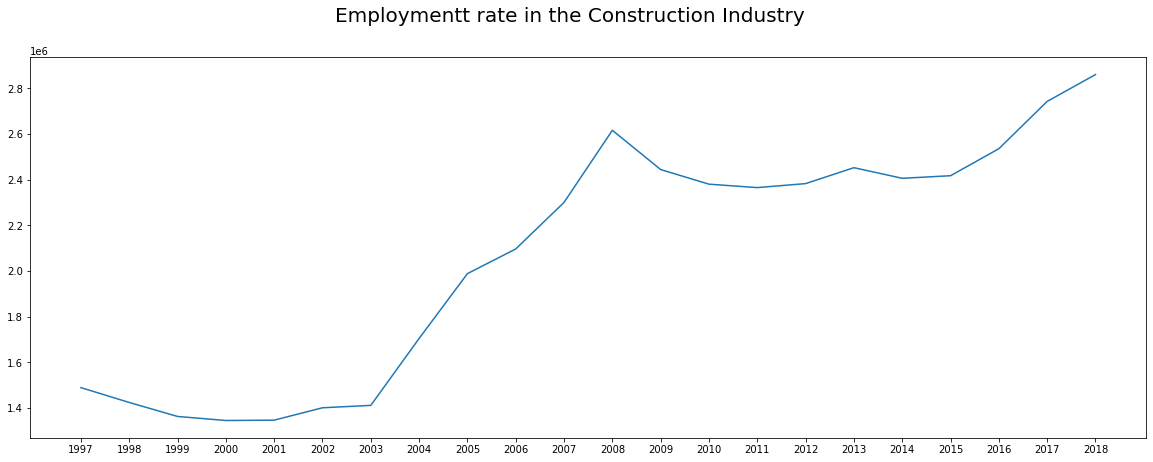

In [20]:
fig1, ax1 = plt.subplots()
fig1.set_size_inches([20, 7])
ax1.plot(construction_employment_by_year.index, construction_employment_by_year.values)
ax1.set_xticks(range(1997, 2019))
fig1.suptitle('Employmentt rate in the Construction Industry', fontsize=20)
plt.show()

We slice the DataFrame to get rows for the Construction industry, then we group the Construction DataFrame by SYEAR column so that we can plot the employment trend across the years, from 1997 - 2018. 
There has been significant growth, an upward trend, in the construction industry, there was a peak in the growth rate from 2003.


### Employment in Construction evolved over time?

Let us consider the percentage of all employments in the construction industry against total employment across all industries.

In [21]:
percentage = (construction['Employment'].sum() / data_output['Employment'].sum())*100
percentage

11.566374741895782

The percentage of total construction employments from 1997 - 2018 from the total number of employments in all industries (construction industry inclusive) is approx. 11.56%


Let us consider the employment rate of other industries (excluding the construction industry) in total, how has the employment rate been?

In [22]:
other_industriesA = data_output.loc[np.invert(data_output['LMO_Detailed_Industry'] == 'Constructions')]
other_industriesA_employment_by_year = other_industriesA.groupby(['SYEAR'])['Employment'].sum()


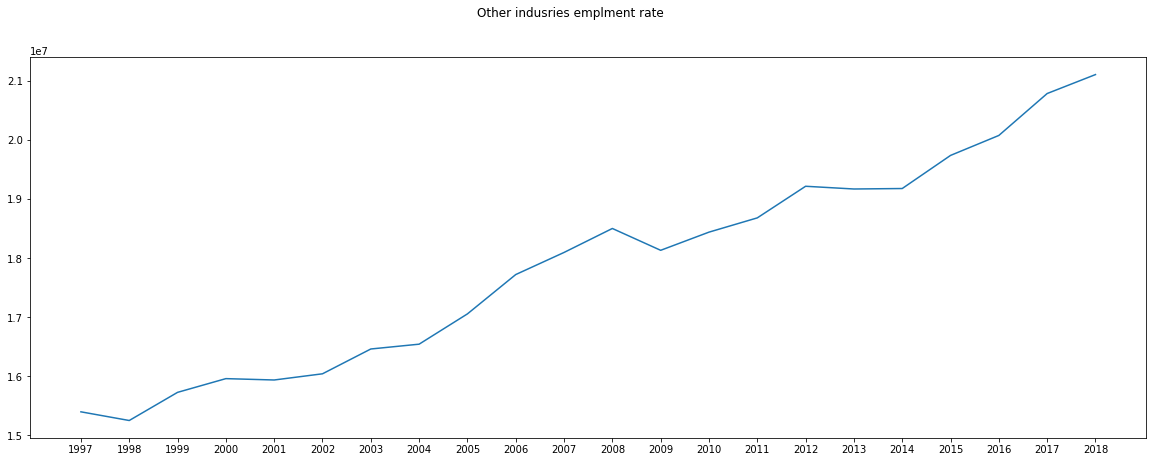

In [23]:
fig2, ax2 = plt.subplots()
fig2.set_size_inches([20, 7])
ax2.plot(other_industriesA_employment_by_year.index, other_industriesA_employment_by_year.values)
ax2.set_xticks(range(1997, 2019))
fig2.suptitle('Other indusries emplment rate')
plt.show()

We can clearly see that there has been a significant upward trend in the employment rate of these industries, just like the construction industry. 